In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to match input shape for Conv2D (batch_size, height, width, channels)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [3]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Users\Hoi Yee\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
epochs = 10
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.8925 - loss: 0.3403 - val_accuracy: 0.9819 - val_loss: 0.0551
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9842 - loss: 0.0487 - val_accuracy: 0.9886 - val_loss: 0.0347
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9920 - val_loss: 0.0269
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9930 - loss: 0.0228 - val_accuracy: 0.9897 - val_loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9889 - val_loss: 0.0356
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9893 - val_loss: 0.0365
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9918 - val_loss: 0.0276
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9966 - 

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 1s - 5ms/step - accuracy: 0.9913 - loss: 0.0344

Test accuracy: 0.9913


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


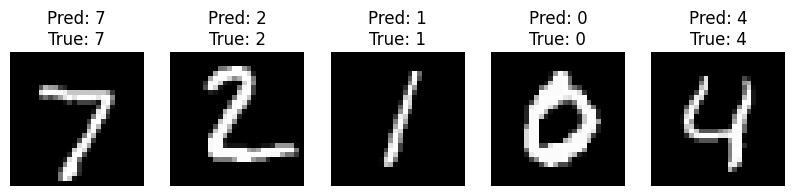

In [8]:
import numpy as np

# Predict on test images
predictions = model.predict(x_test)

# Plot some test images with predictions
num_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f'Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}')
    plt.axis('off')
plt.show()
